In [1]:
#Similiar to advertising with degree of 2 instead of 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

#Based on age, physical score, resulting 0 or 1 if hearing was impaired (pass or fail) 0 = fail
#df = pd.read_csv("hearing_test.csv") 
df = pd.read_csv("hearing_test.csv") 

In [2]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df['test_result'].value_counts()
#3000 people passed, 2000 failed

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

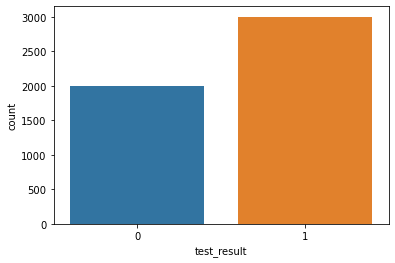

In [5]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

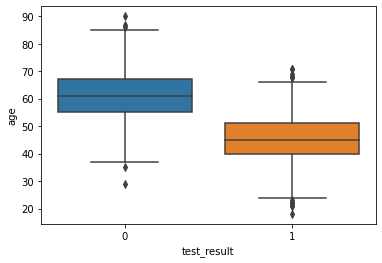

In [6]:
sns.boxplot(x='test_result', y='age', data=df)
#Generally older age results in higher liklihood to fail

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

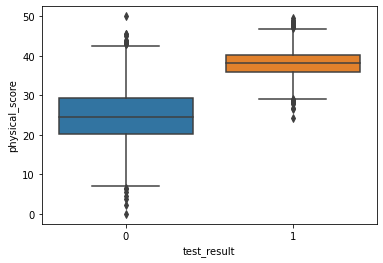

In [7]:
sns.boxplot(x='test_result',y='physical_score',data=df)
#generally people that pass almost always have high phys score

<AxesSubplot:xlabel='age', ylabel='physical_score'>

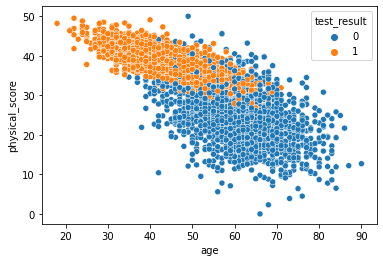

In [8]:
sns.scatterplot(x = 'age', y = 'physical_score', data=df, hue='test_result')
#generally passes have lower age and higher physical score

<AxesSubplot:>

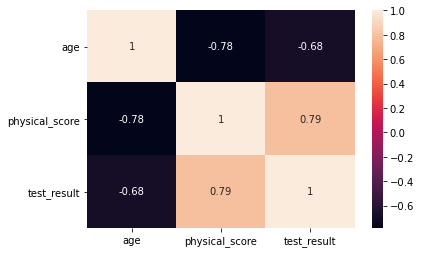

In [9]:
sns.heatmap(df.corr(), annot=True)
#Age is strongly negatively correlated (older = more failure)
#Physical has higher val = higher pass

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

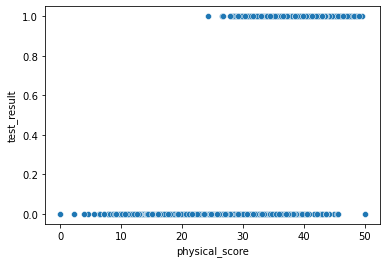

In [10]:
sns.scatterplot(x='physical_score',y='test_result',data=df)
#Pass and fails based on age (pass 1, fail 0)

<AxesSubplot:xlabel='age', ylabel='test_result'>

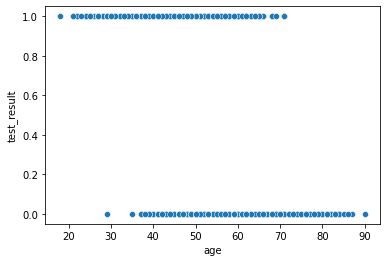

In [11]:
sns.scatterplot(x='age',y='test_result',data=df)
#Pass and fails based on age (pass 1, fail 0)

In [12]:
X=df.drop('test_result',axis=1)
y=df['test_result']

In [13]:
X.head()

,age,physical_score
0,33.0,40.7
1,50.0,37.2
2,52.0,24.7
3,56.0,31.0
4,35.0,42.9


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
#Test is 10%, 90% is the train

In [16]:
scaler = StandardScaler()
#all features will have the same weight in contribution

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(scaled_X_train,y_train)
#fit scaled x and y train to the logistic model

LogisticRegression()

In [21]:
log_model.coef_
#-0.94953524 statical data for age, 3.45991194 for physical score
#*is in order of the columns
#highly unlikely for high age to pass, highly likely for high score to pass

array([[-0.94953524,  3.45991194]])

In [22]:
#make a confusion matrix, need to download
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [23]:
#Take the model and predict the scaled X test
y_pred = log_model.predict(scaled_X_test)

In [24]:
#We check the accuracy score TP + TN / N
accuracy_score(y_test,y_pred)

0.93

In [25]:
confusion_matrix(y_test,y_pred)
#shows TN, FP, FN, and TP

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [26]:
#Shows how accuracy score was calculated
(172+293) / (500)

0.93

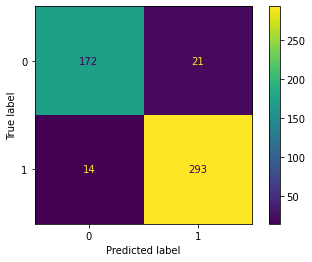

In [27]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

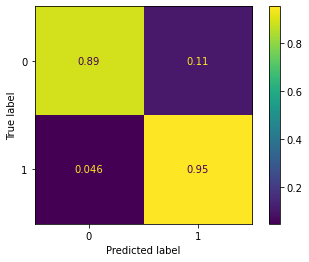

In [28]:
plot_confusion_matrix(log_model,scaled_X_test,y_test, normalize = "true")
#This is better because it tells the percentage of accuracy
#normalize = highest can be 1

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

